## Chargement les packages 

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
os.getcwd()

'/Users/quyen/PycharmProjects/Meteo_australie/src'

## Définition des fonctions <a class="anchor" id="section_2"></a>

In [2]:

def tweak_data(df: pd.DataFrame):
    """
    Cette fonction sert à définir les types des variables du dataframe des données
    """
    return (df
            .replace({'Yes': 1, 'No': 0})
            .astype({'Location': 'category',
                     'MinTemp': "float32",
                     'MaxTemp': 'float32',
                     'WindDir9am': 'category',
                     'WindGustDir': 'category',
                     'WindDir3pm': 'category',
                     'Cloud9am': 'float32',
                     'Cloud3pm': 'float32',
                     'RainToday': 'float32',
                     'RainTomorrow': 'float32'})
            )

# Vertical bar plots
def bar_plot(df: pd.DataFrame, x_name: str, y_name: str,
             fig_size=(12, 8),
             title: str = "", x_label: str = "", y_label: str = "",
             xticks_rotation: int = 0):
    fig = plt.figure(figsize=fig_size)

    p = sns.barplot(data=df, x=x_name, y=y_name)
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.xticks(rotation=xticks_rotation)
    # Tweak spacing to prevent clipping of tick-labels
    plt.subplots_adjust(bottom=0.2)

    # Annotate
    for bar in p.patches:
        p.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center', size=12, xytext=(0, 8),
                   textcoords='offset points'
                   )

    plt.show()
    return fig

# Horizontal bar plots
def horizontal_bar_plot(df: pd.DataFrame, x_name: str, y_name: str,
                        fig_size=(8, 12),
                        title: str = "", x_label: str = "", y_label: str = "",
                        order = None):
    fig = plt.figure(figsize=fig_size)

    if order is None:
        p = sns.barplot(data=df, x=x_name, y=y_name)
    else:
        p = sns.barplot(data=df, x=x_name, y=y_name, order=order)
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    # Tweak spacing to prevent clipping of tick-labels
    plt.subplots_adjust(bottom=0.2)

    # Annotate
    for bar in p.patches:
        p.annotate(format(bar.get_width(), '.2f'),
                   (bar.get_width() + 1, bar.get_y() + bar.get_height()),
                   ha='center', va='center', size=12, xytext=(0, 8),
                   textcoords='offset points'
                   )
    plt.tight_layout()
    plt.show()
    return fig

def number_of_nan(ser: pd.Series, in_percentage: bool = True):
    """
    Calculer le nombre de valeurs manquantes d'une séries pandas
    Args:
        ser: une séries pandas de données
        in_percentage (bool): True (par défaut) si on veut retourner le pourcentage des valeurs manquantes
            False si on veut retourner le nombre des valeurs manquantes
    """
    if not in_percentage:
        return ser.isna().sum()
    else:
        return np.round(100 * (ser.isna().sum() / len(ser)), 2)

## Chargement et Nettoyage des données  <a class="anchor" id="section_3"></a>

|Numéro	|Nom de colonne	|Unité	|Explication|
|:---:|:--------:|:--------:|:--------------------:|
|1|	Date	|	|Date d’observation
|2|	Location|	|	Location de la station météo
|3|	MinTemp|	Degrés Celsius|	Température minimum en 24 heures jusqu’à 9am
|4|	MaxTemp|	Degrés Celsius|	Température maximum en 24 heures jusqu’à 9am
|5|	Rainfall|	Millimètres|	Précipitation en 24 heures jusqu’à 9am
|6|	Evaporation|	Millimètres|	Évaporation en 24 heures jusqu’à 9am
|7|	Sunshine|	Heure	|Soleil radieux en 24 heures jusqu’à minuit
|8|	WindGustDir|	16 compass points|	Direction de la rafale de vent la plus forte en 24 heures jusqu’à minuit
|9|	WindGustSpeed|	Kilomètres par heure|	Vitesse de la rafale de vent la plus forte en 24 heures jusqu’à minuit
|10|	WindDir9am|	16 compass points|	Direction de vent à 9am
|11|	WindDir3pm|	16 compass points|	Direction de vent à 3pm
|12|	WindSpeed9am|	Kilomètres par heure|	Vitesse de vent à 9am
|13|	WindSpeed3pm|	Kilomètres par heure|	Vitesse de vent à 3pm
|14|	Humidity9am|	Pourcentage|	Humidité relative à 9am
|15|	Humidity3pm|	Pourcentage|	Humidité relative à 3pm
|16|	Pressure9am|	Hectopascals|	Pression atmosphérique réduite au niveau moyen de la mer à 9am
|17|	Pressure3pm|	Hectopascals|	Pression atmosphérique réduite au niveau moyen de la mer à 3pm
|18|	Cloud9am|	Huitièmes|	Fraction de ciel obscurcie par les nuages à 9am
|19|	Cloud3pm|	Huitièmes|	Fraction de ciel obscurcie par les nuages à 3pm
|20|	Temp9am|	Degrés Celsius|	Température à 9am
|21|	Temp3pm|	Degrés Celsius|	Température à 3pm
|22|	RainToday|	Binaire (Yes, No)|	La journée en cours a-t-elle reçu des précipitations supérieures à 1 mm en 24 heures jusqu’à 9h ?
|23|	RainTomorrow|	Binaire (Yes, No)|	Le lendemain a-t-il reçu des précipitations dépassant 1 mm en 24 heures jusqu’à 9am ?


### Chargement des données et définition des types de variables  <a class="anchor" id="section_3_1"></a>

In [3]:
# Déterminer le chemin où le fichier de données se trouve
fichier_data = "../data/weatherAUS.csv"
df_data = pd.read_csv(fichier_data)

# print(df_data.shape)
print(df_data)

              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ... 

Déterminer les types de variables (quantitative ou qualitative) et les types de donnée de chaque variable.
- Transformer la colonne *Date* étant en object en datetime et les utiliser pour indexer le dataframe.
- Remplacer les valeurs Yes par 1 et No par 0 dans les deux colonnes *RainToday* et *RainTomorrow*.
- Convertir les 4 variables qualitatives *Location*, *WindGustDir*, *WindDir9am* et *WindDir3pm* en type "category"

In [4]:
df_cleaned_data = tweak_data(df_data)

# Vérifier si les colonnes sont en bon type

type_avant = df_data.dtypes
type_apres = df_cleaned_data.dtypes

df_types = pd.concat([type_avant, type_apres], axis=1)
df_types.columns = ["Original", "Netoyee"]
print(df_types)


              Original   Netoyee
Date            object    object
Location        object  category
MinTemp        float64   float32
MaxTemp        float64   float32
Rainfall       float64   float64
Evaporation    float64   float64
Sunshine       float64   float64
WindGustDir     object  category
WindGustSpeed  float64   float64
WindDir9am      object  category
WindDir3pm      object  category
WindSpeed9am   float64   float64
WindSpeed3pm   float64   float64
Humidity9am    float64   float64
Humidity3pm    float64   float64
Pressure9am    float64   float64
Pressure3pm    float64   float64
Cloud9am       float64   float32
Cloud3pm       float64   float32
Temp9am        float64   float64
Temp3pm        float64   float64
RainToday       object   float32
RainTomorrow    object   float32


Le but de définir le type adéquat pour une colonne donnée est d'optimiser l'espace de mémoire. Le résultat suivant montre que l'on gagne bien en terme de l'espace lorsque l'on définit les types variables qualitatives en "category" par rapport au type "object".

In [5]:
# Memory usage

memory_avant = df_data.memory_usage(deep=True)
memory_apres = df_cleaned_data.memory_usage(deep=True)

df_memory = pd.concat([memory_avant, memory_apres], axis=1)
df_memory.columns = ["Original", "Netoyee"]
print(df_memory)

               Original  Netoyee
Index               128      128
Date            9745820  9745820
Location        9558413   149749
MinTemp         1163680   581840
MaxTemp         1163680   581840
Rainfall        1163680  1163680
Evaporation     1163680  1163680
Sunshine        1163680  1163680
WindGustDir     8329678   146964
WindGustSpeed   1163680  1163680
WindDir9am      8321518   146964
WindDir3pm      8497355   146964
WindSpeed9am    1163680  1163680
WindSpeed3pm    1163680  1163680
Humidity9am     1163680  1163680
Humidity3pm     1163680  1163680
Pressure9am     1163680  1163680
Pressure3pm     1163680  1163680
Cloud9am        1163680   581840
Cloud3pm        1163680   581840
Temp9am         1163680  1163680
Temp3pm         1163680  1163680
RainToday       8525973   581840
RainTomorrow    8525808   581840


La variable *Date* n'est pas utile pour prédire la variable target *RainTomorrow*. On va l'utiliser pour indexer le dataframe.

In [6]:
df_cleaned_data = (df_cleaned_data
                  .set_index(pd.to_datetime(df_cleaned_data.Date))
                  .drop("Date", axis=1)
                  )

print(df_cleaned_data.sample(5))

                 Location    MinTemp    MaxTemp  Rainfall  Evaporation  \
Date                                                                     
2015-10-14         Hobart   7.600000  21.400000       0.0          4.6   
2015-06-10     PearceRAAF  12.700000  24.799999       0.0          NaN   
2014-11-06         Darwin  21.500000  33.500000      20.0          7.0   
2011-12-15  NorfolkIsland  18.799999  23.400000       9.0          2.2   
2012-03-31        Mildura  16.000000  30.600000       0.0          4.8   

            Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  \
Date                                                                   ...   
2015-10-14       9.0         NNW           31.0        NNW         SE  ...   
2015-06-10       9.2         ENE           37.0        NNE         NE  ...   
2014-11-06      10.5         ENE           63.0         SE        NNW  ...   
2011-12-15      12.4          SW           35.0        WSW         SW  ...   
2012-03-31   

### Identification et traitement des données manquantes  <a class="anchor" id="section_3_2"></a>

Ci-dessous les étapes à effectuer:
- **Etape 1**: Identifier les données manquantes (par observation ou par variable)

- **Etape 2**: Chercher à comprendre quels types de données manquantes 
  
- **Etape 3**: Comment traiter les données manquantes

#### Etape 1: Identifier les données manquantes

**Déterminer les données manquantes pour chaque observation (ligne)**

Le data set contient 145460 observations (lignes) dont plusieurs lignes contiennent des valeurs manquantes pour une ou plusieurs colonnes.


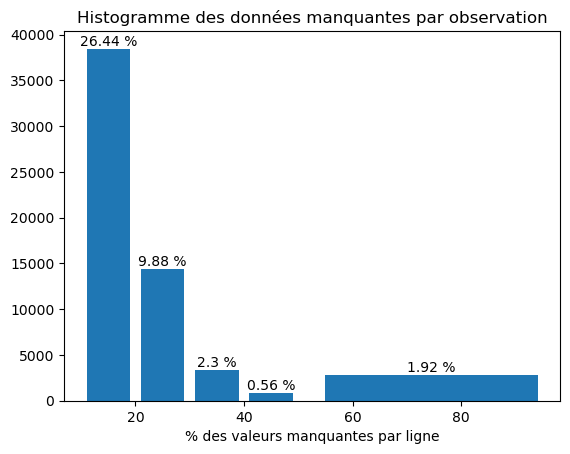

In [7]:
pct_missing_by_row = ((df_cleaned_data.isna().sum(axis=1) * 100) / df_cleaned_data.shape[1]).to_frame()
pct_missing_by_row.columns = ["pct_missing"]

fig, ax = plt.subplots(1, 1)

ax.hist(pct_missing_by_row, rwidth=0.8,
        bins=[10, 20, 30, 40, 50, 99])
ax.set_xlabel("% des valeurs manquantes par ligne")
ax.set_title("Histogramme des données manquantes par observation")
for rect in ax.patches:
    label = f"{round(100 * rect.get_height() / df_data.shape[0], 2)} %"
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 5,
           label, ha="center", va="bottom")

plt.show()

# print(pct_missing_by_row.sort_values(by="pct_missing", ascending=False))

**Déterminer les données manquantes pour chaque variable (colonne)**

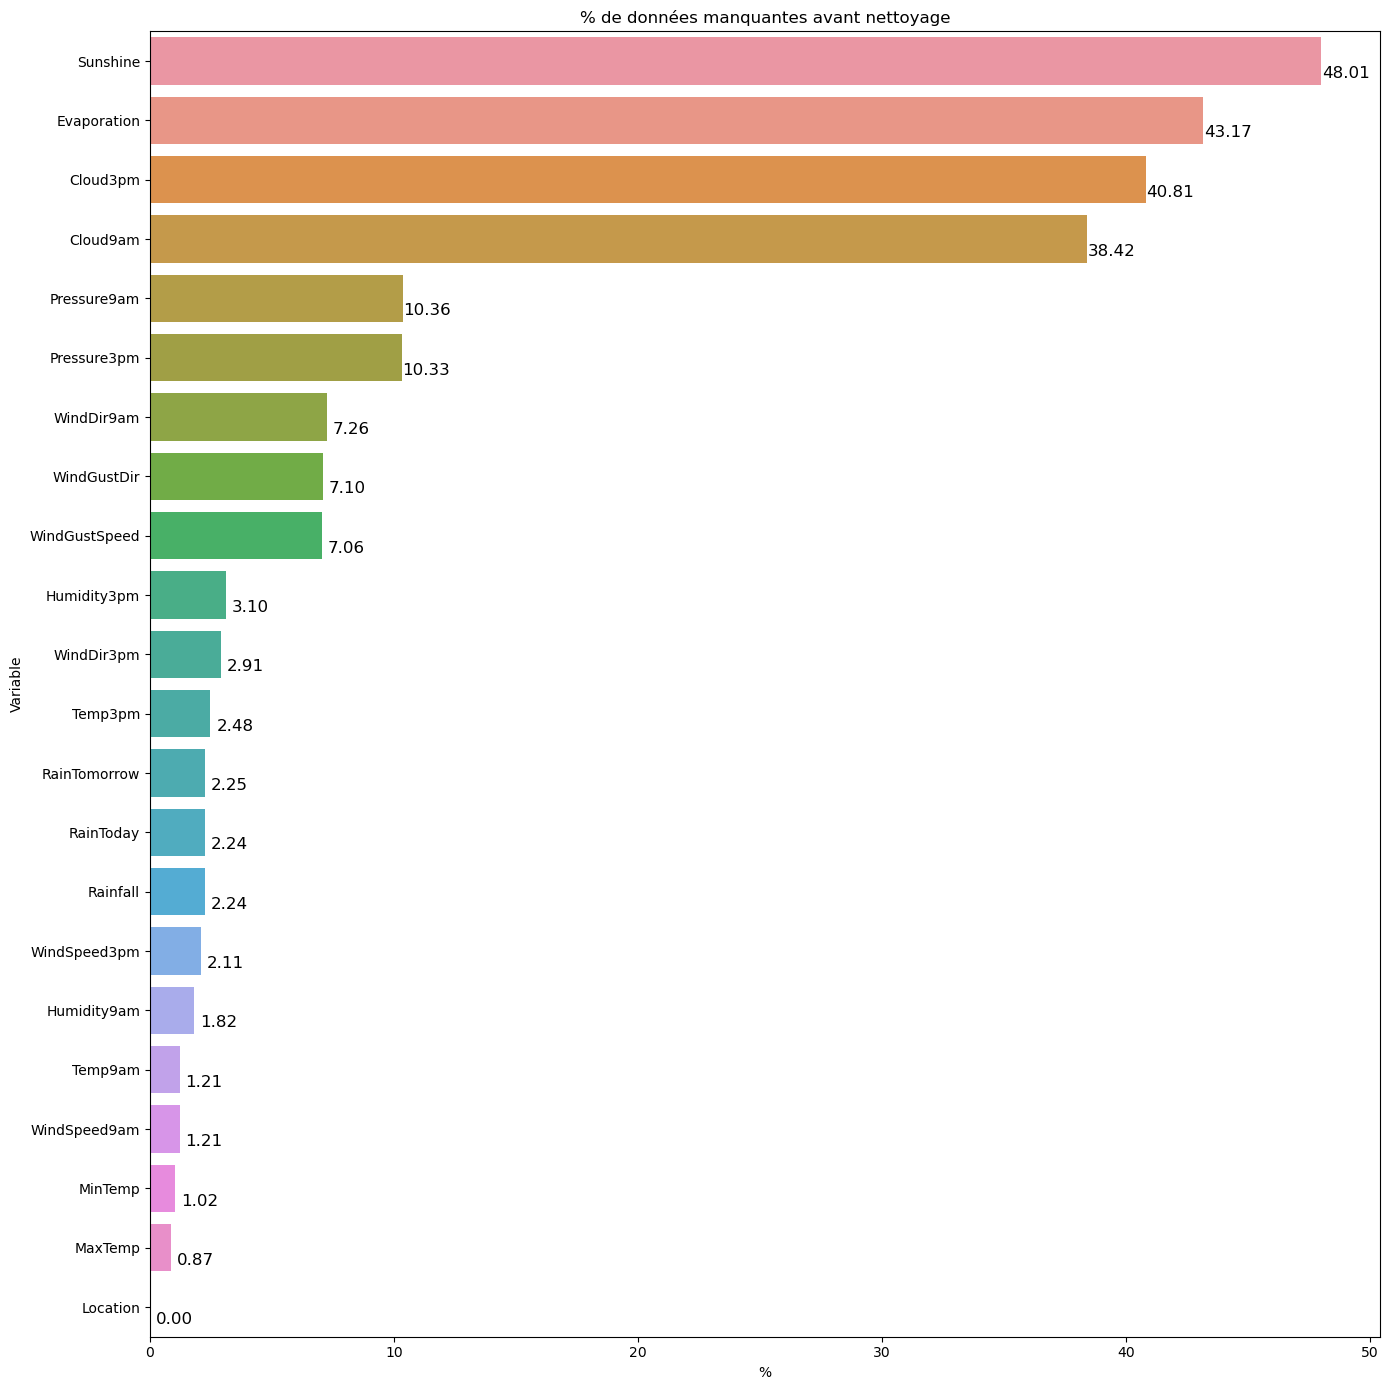

In [8]:
pct_missing_by_col = ((df_cleaned_data.isna().sum() * 100) / df_cleaned_data.shape[0]).sort_values(ascending=False).to_frame()
pct_missing_by_col.columns = ["pct_missing"]
pct_missing_by_col["variable"] = pct_missing_by_col.index

fig_hbar1 = horizontal_bar_plot(pct_missing_by_col, y_name="variable", x_name="pct_missing",
                     fig_size=(14, 14),
                     title="% de données manquantes avant nettoyage",
                     y_label="Variable", x_label="%") 

Le barplot ci-dessus représente le pourcentage de données manquantes pour chaque variables.
- La variable target "RainTomorrow" présente 2.25% de données manquantes.
- La variable "Location" ne contient aucune donnée manquante
- Les 4 variables "Sunshine", "Evaporation", "Cloud3pm" et "Cloud9am" présentent une proportion importante de données manquantes.


#### Etape 2: Déterminer les types de données manquantes

Avant de traiter les données manquantes, il faut comprendre pourquoi les données sont manquantes. Les données manquantes peuvent être divisées en 3 catégories:
  + **Missing Completely at Random (MCAR)**: ce sont des données qui manquent complètement au hasard. C'est-à-dire que l'absence est indépendante des données. 
  + **Missiing at Random (MAR)**: ce sont des données qui manquent au harsard mais pas complètement.
  + **Not Missing at Random (NMAR)**: ce sont des données qui ne manquent pas au hasard et sont également appelées données ignorables. En d'autres termes, l'absence de données manquantes est déterminée par la variable d'intérêt.
  

Tout d'abord, on regarde les données manquantes de la variable target *RainTomorrow*. Le graphique ci-dessous présente le pourcentage de valeurs manquantes de cette variable ville par ville.

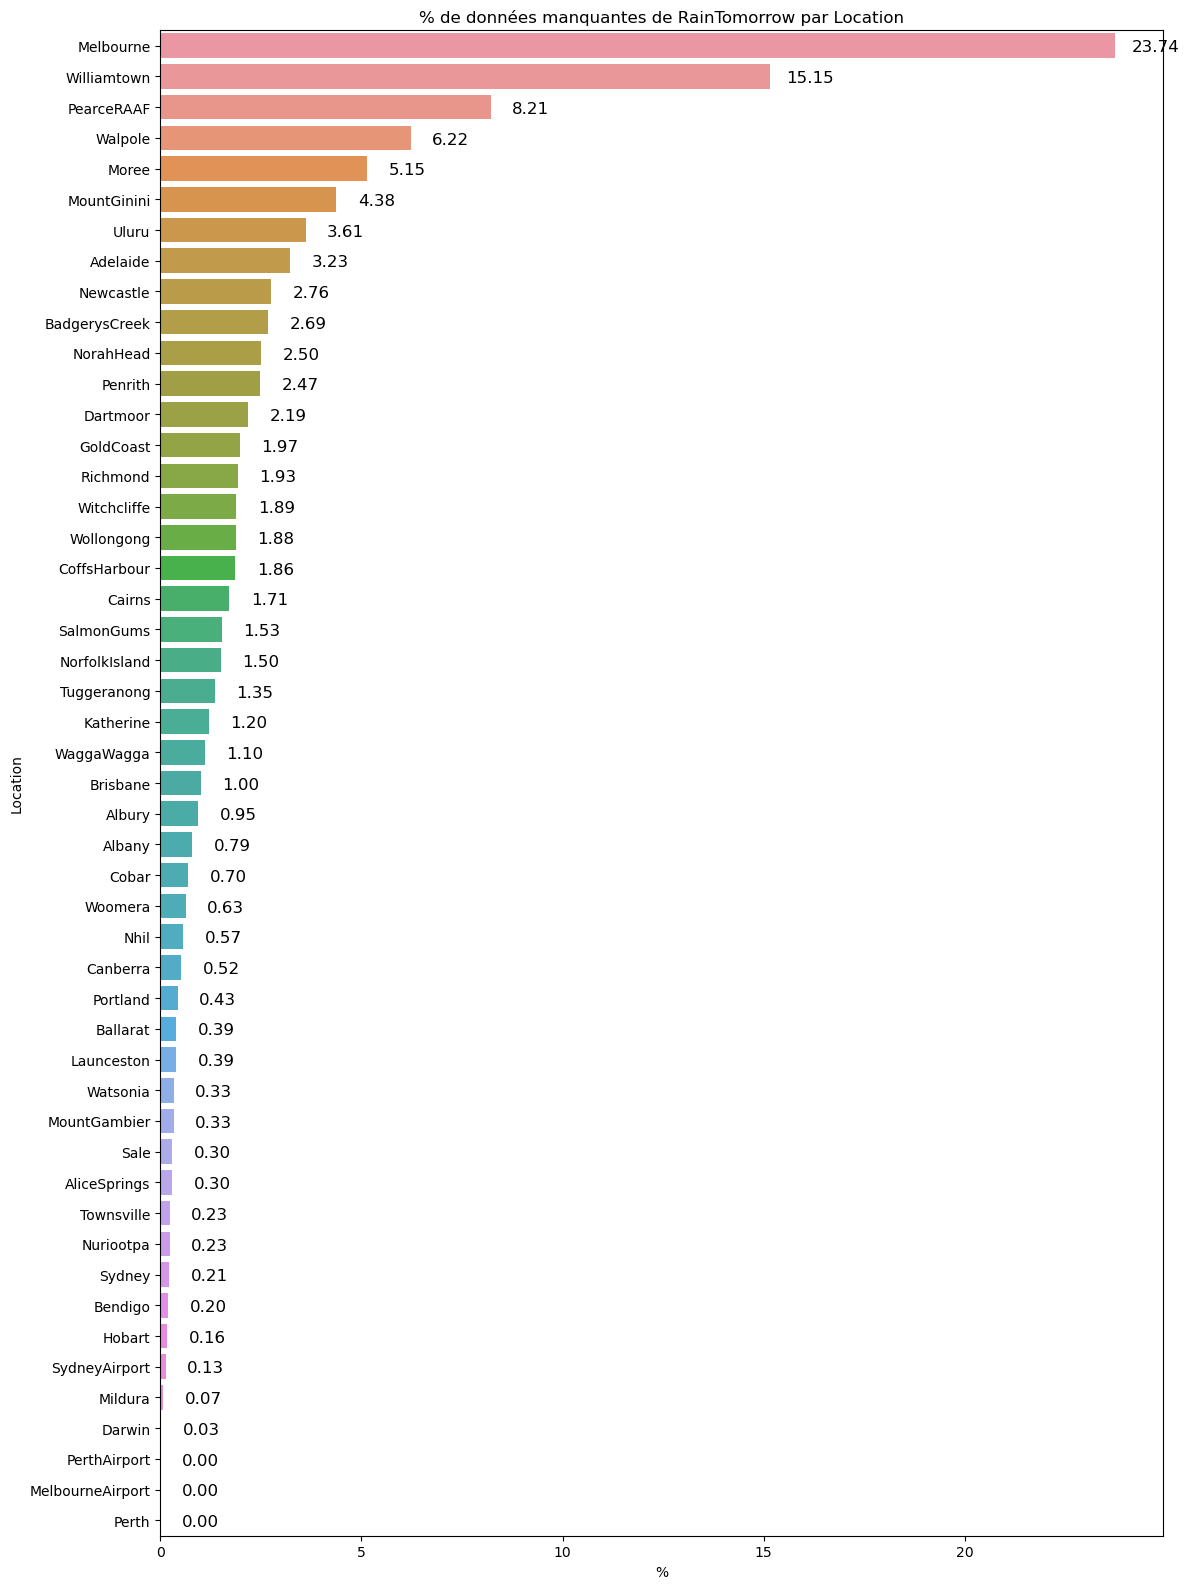

In [9]:
# Identifier les données manquantes pour la variable target
df_missing_target_by_loc = (df_cleaned_data
                            .pivot_table(index="Location", values="RainTomorrow",aggfunc=number_of_nan)
                            .sort_values("RainTomorrow", ascending=False)
                           )
df_missing_target_by_loc['Location'] = df_missing_target_by_loc.index

fig_hbar_target = horizontal_bar_plot(df_missing_target_by_loc, 
                                      y_name="Location", x_name="RainTomorrow",
                                      fig_size=(12, 16),
                                      title="% de données manquantes de RainTomorrow par Location",
                                      y_label="Location", x_label="%",
                                      order=df_missing_target_by_loc.sort_values("RainTomorrow", ascending=False).Location
                                     ) 

Le graphique suivant représente les valeurs manquantes de la variable *RainTomorrow* par ville et par date d'observation. Il semble que ces valeurs sont manquantes complètement au hasard.

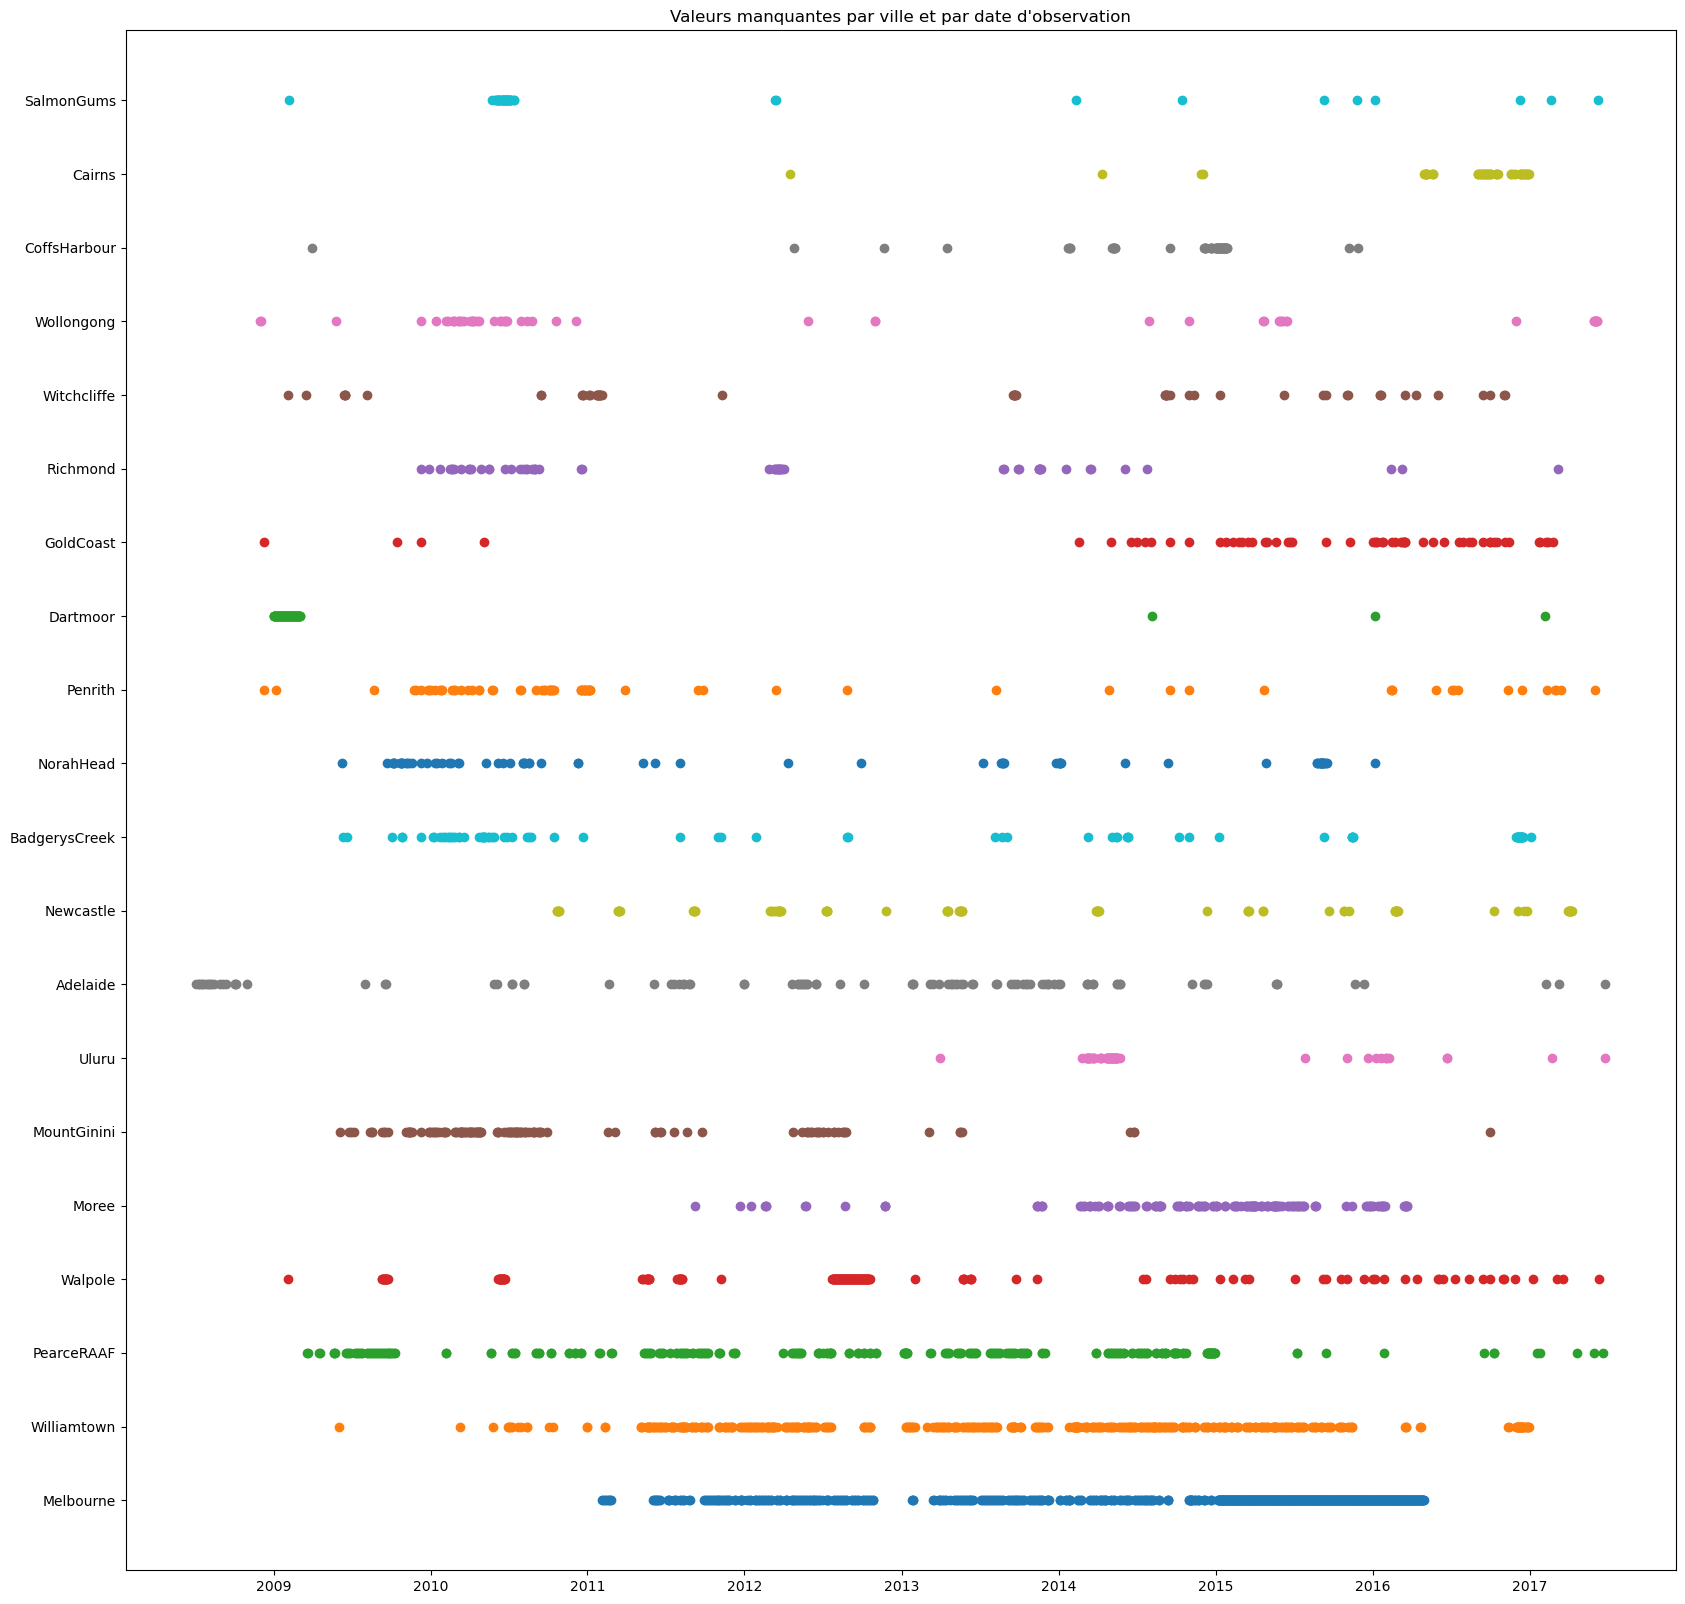

In [10]:
list_location = df_missing_target_by_loc.sort_values("RainTomorrow", ascending=False).Location[:20]

fig, ax = plt.subplots(figsize=(20, 20))

list_yticks = []
list_yticks_label = []
for i, location in enumerate(list_location):
    df = df_cleaned_data.loc[df_cleaned_data.Location == location, "RainTomorrow"].to_frame()
    df["missing"] = [np.nan if not np.isnan(r) else i + 0.1 for r in df.RainTomorrow]
    ax.plot(df.index, df.missing, 'o', label=location)
    list_yticks.append(i + 0.1)
    list_yticks_label.append(location)

ax.set_yticks(list_yticks)
ax.set_yticklabels(list_yticks_label)
ax.set_title("Valeurs manquantes par ville et par date d'observation")
plt.show()

#### Etape 3: Traiter les données manquantes

Il y a 3 techniques principales pour traiter les données manquantes:
- **EFFACEMENT(DELETION)**:
    + suppression d'observation (listwise deletion): la suppression par liste supprime toutes les données d'une observation qui a une ou plusieurs valeurs manquantes.
    + suppression de variable: si une variable contient un important nombre de données manquantes (plus de 60% par exemple), on peut la supprimer, mais uniquement si cette variable est insignifiante. 
    + suppression par paire (pairwise deletion): la suppression par paires analyse tous les cas dans lesquels les variables d’intérêt sont présentes et maximise ainsi toutes les données disponibles par une base d’analyse.
    
- **IMPUTATION**: 

    + Pour les variables quantitatives: comme ce sont des données temporéelles avec tendance et avec saisonnalité, nous allons utiliser la méthode "ajustement saisonnier avec interpolation linéaire".
    + Pour les variables catégoriales: 
        * on peut utiliser la méthode l'imputation modale mais elle introduira certainement un biais
        * les valeurs manquantes peuvent être traitées comme une catégorie distincte en soi. On peut créer une autre catégorie pour les valeurs manquantes et les utiliser comme un niveau différent.

   

**Variable target RainTomorrow**
On observe qu'il y a 1.92% d'observations contenant plus de 50% de données manquantes pour les variables.

- On supprime ces observations (lignes)? 

- A partir de quel seuil de données manquantes par observation, on supprime l'observation?



In [11]:
threshold_missing_by_obs = 50  # à décider

df_cleaned_data = df_cleaned_data.loc[pct_missing_by_row[pct_missing_by_row["pct_missing"] < threshold_missing_by_obs].index, :]
print(df_data.shape)
print(df_cleaned_data.shape)

(145460, 23)
(6708927, 22)


Pour la variable target *RainTomorrow*, on va supprimer les lignes où il n'y a pas d'information.

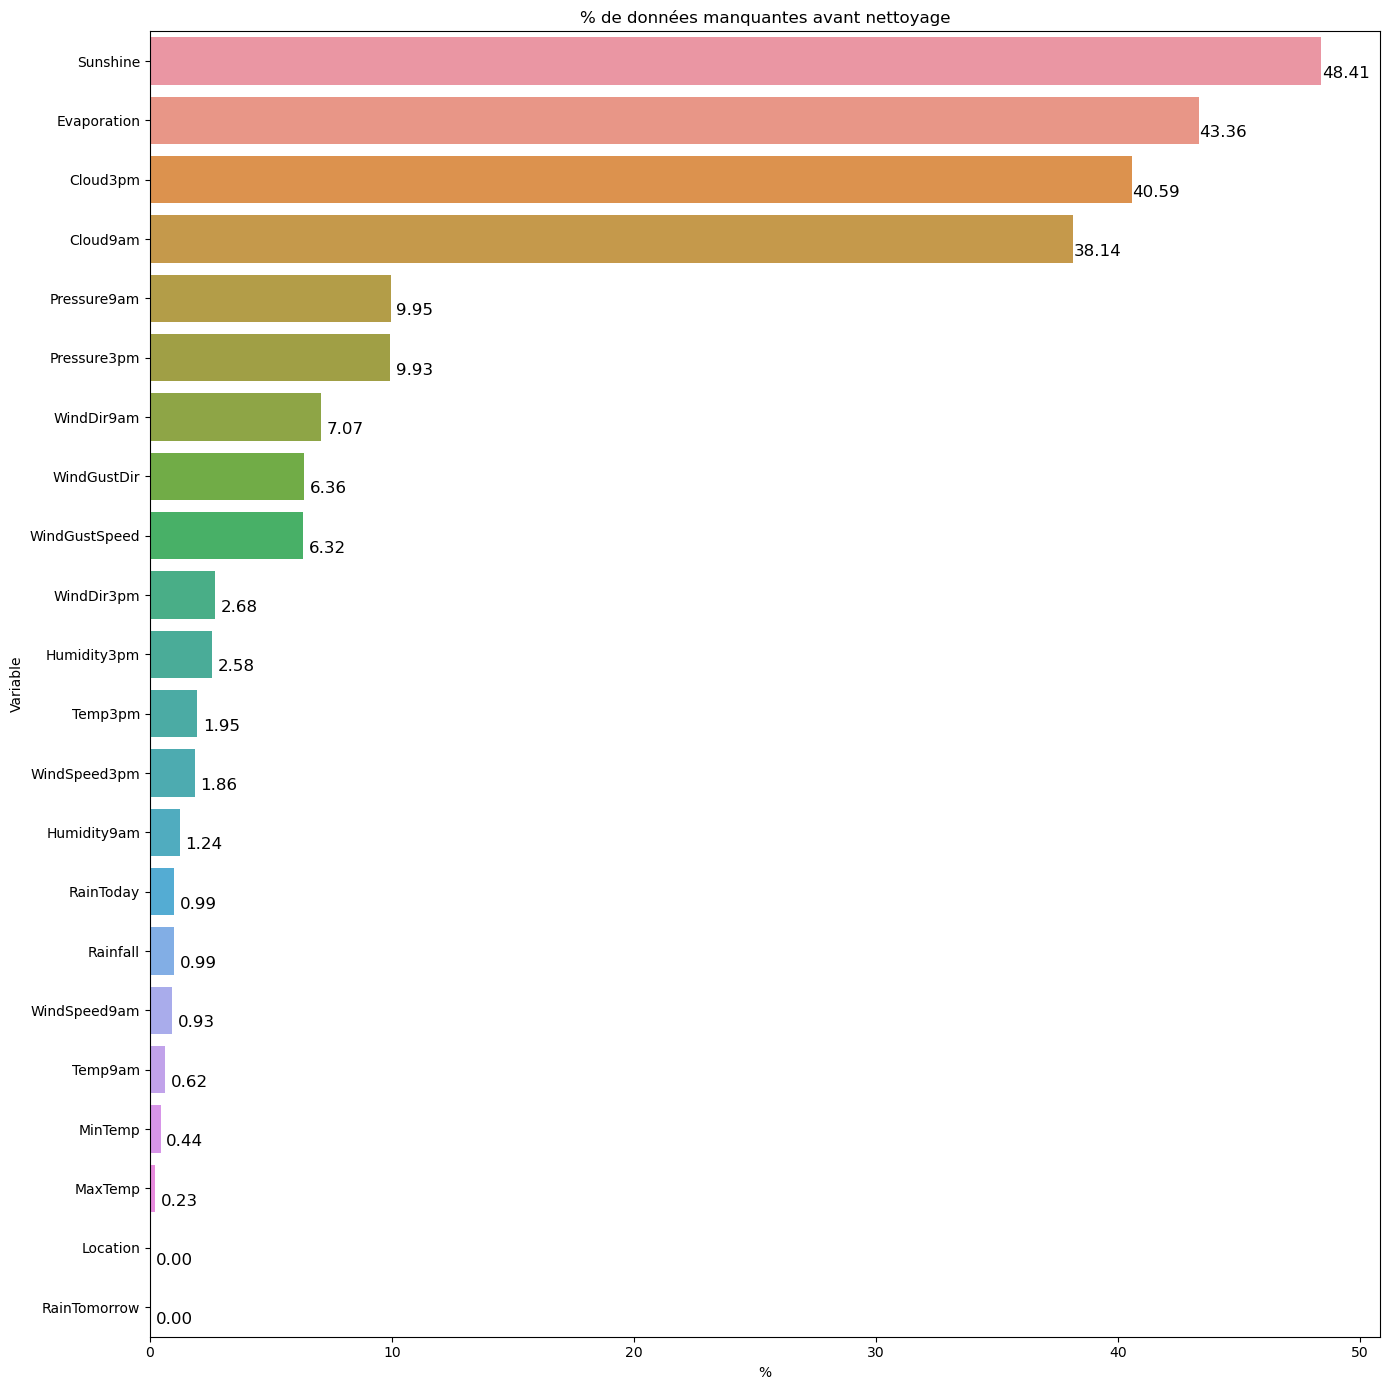

In [12]:
# Enlever les lignes où la colonne "RainTomorrow" n'a pas de donnée
df_cleaned_data = df_cleaned_data.dropna(axis=0, how='any', subset=['RainTomorrow'])

# Déterminer des données manquantes sur chaque colonne après avoir nettoyé
pct_missing = ((df_cleaned_data.isna().sum() * 100) / df_cleaned_data.shape[0]).sort_values(ascending=False).to_frame()
pct_missing.columns = ["pct_missing"]
pct_missing["variable"] = pct_missing.index

fig_hbar2 = horizontal_bar_plot(pct_missing, y_name="variable", x_name="pct_missing",
                     fig_size=(14, 14),
                     title="% de données manquantes avant nettoyage",
                     y_label="Variable", x_label="%") 



On constate que le fait de supprimer les lignes où il n'y a pas d'information sur la colonne "RainTomorrow" diminue le nombre de données manquantes pour toutes les autres variables. 


**Les autres variables quantitatives**

Distribution des variables quantitatives

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


Text(0.5, 0.98, 'Histograms des variables quantatives')

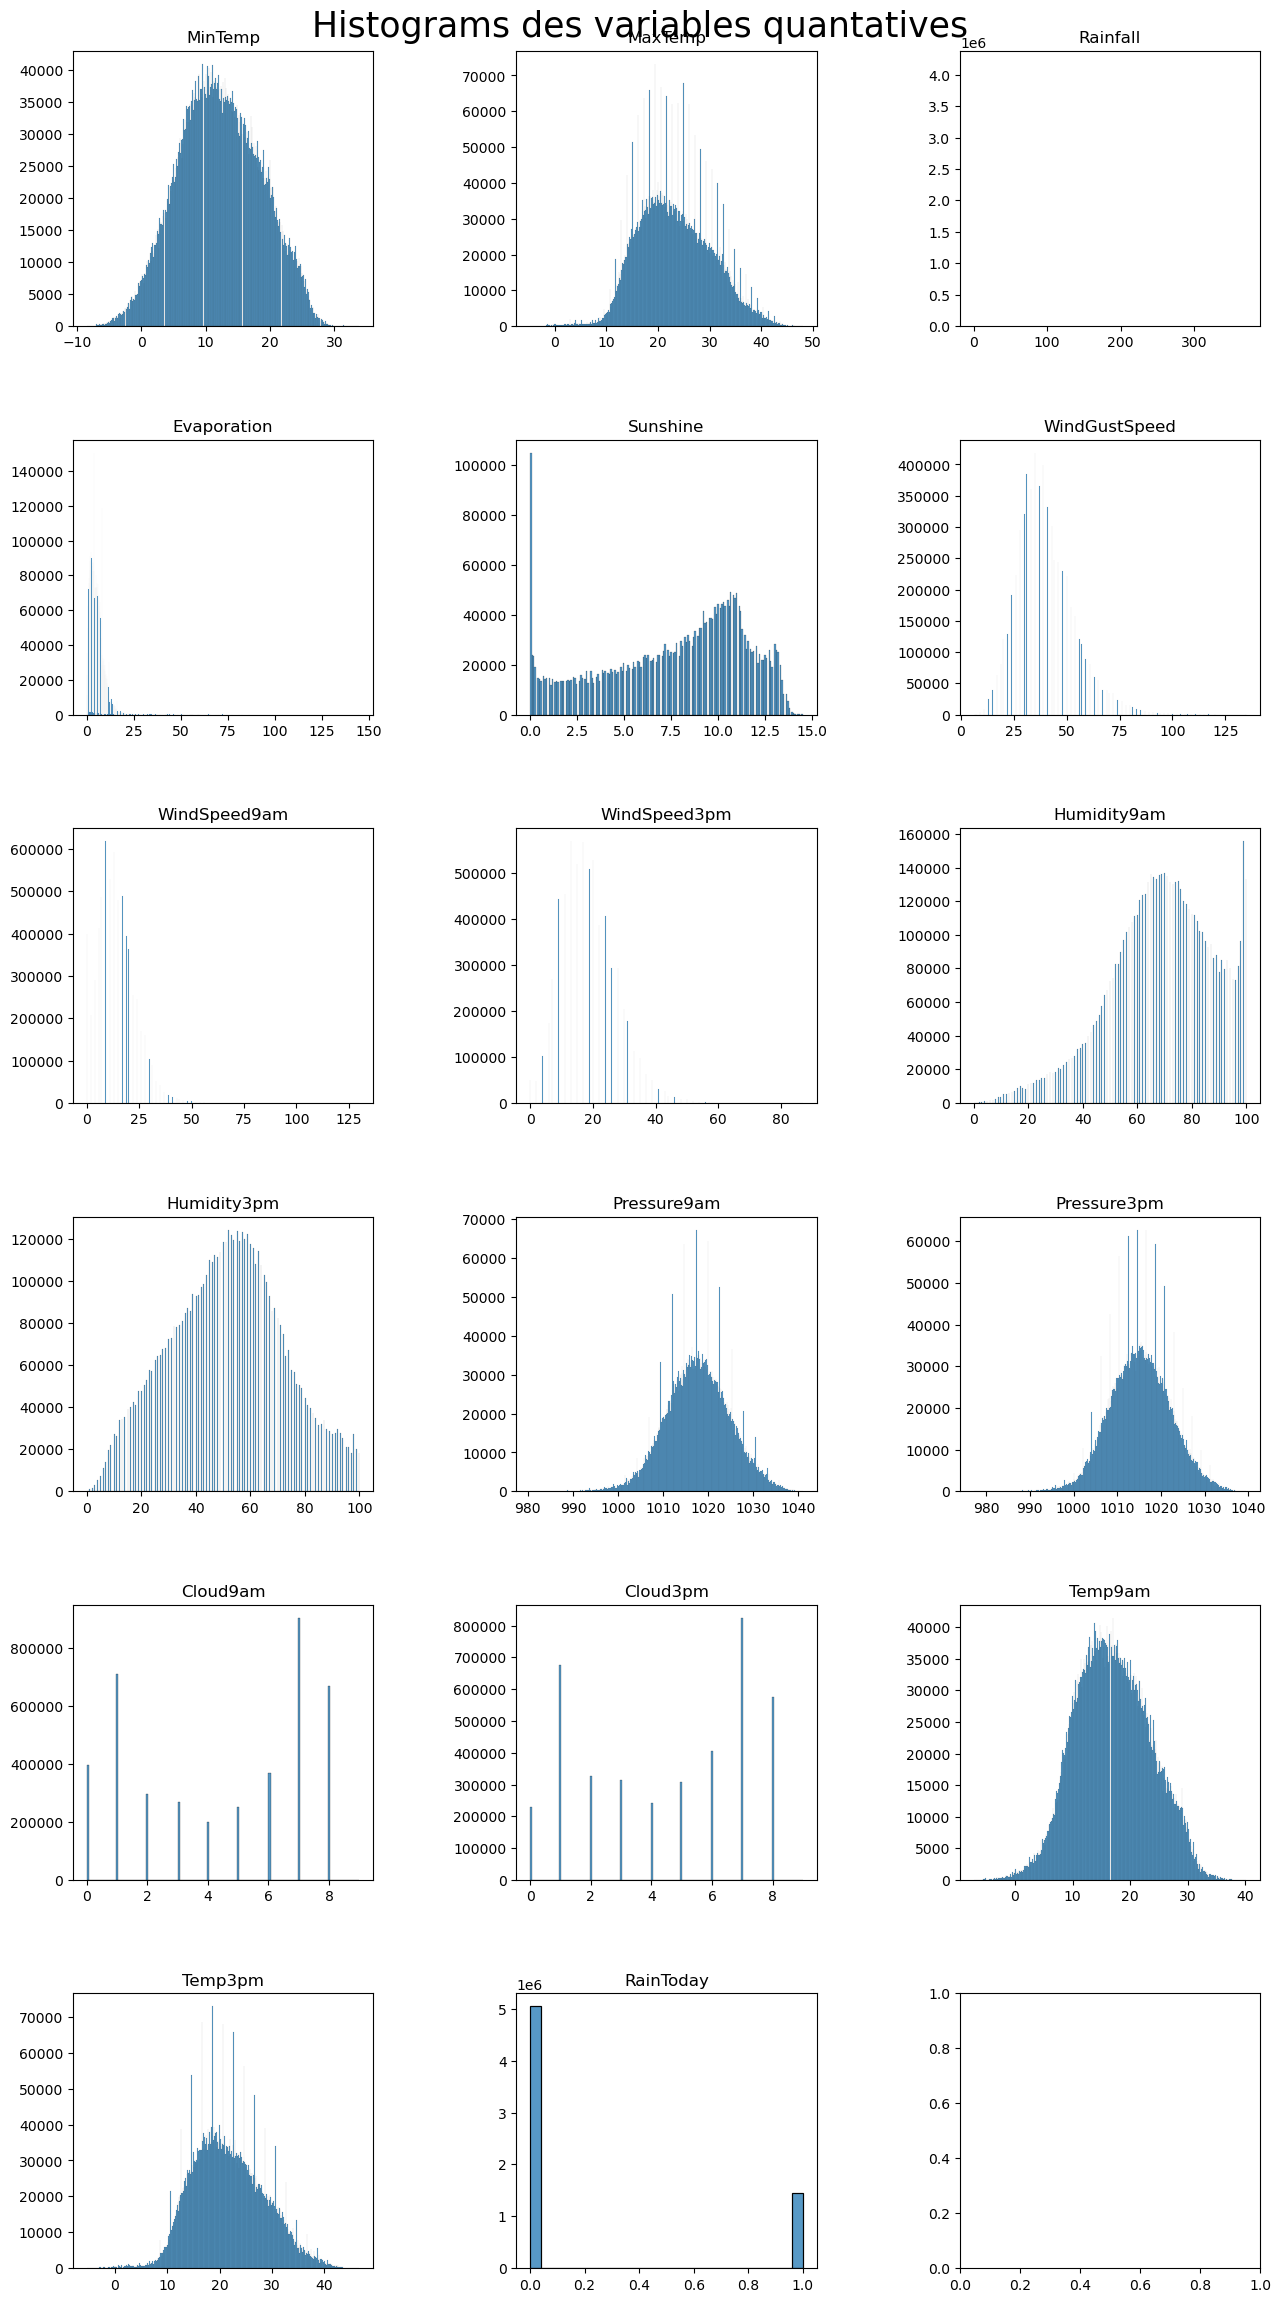

In [13]:
quantitative_features = list(df_cleaned_data.select_dtypes(include=np.number).columns)
quantitative_features.remove("RainTomorrow")
print(quantitative_features)
len(quantitative_features)

fig_hist, axes = plt.subplots(figsize=(14,24), nrows=6, ncols=3)
axes = axes.reshape(-1)

for i, col in enumerate(quantitative_features):
    sns.histplot(df_cleaned_data[col].fillna(np.nan), ax=axes[i])
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].title.set_text(col)
    
plt.tight_layout(pad=5.0)
fig_hist.suptitle("Histograms des variables quantatives",
                 fontsize = 25)
# plt.show()


In [14]:

quantitative_features = list(df_cleaned_data.select_dtypes(include=np.number).columns)
quantitative_features.remove("RainTomorrow")
print(quantitative_features)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


Déterminer le nombre de données manquantes en fonction de Location

In [15]:
# Déterminer le nombre d'observation de chaque station

df_nb_obs_by_location = df_cleaned_data.Location.value_counts()

# Déterminer le nombre de données manquantes pour chaque station
df_missing_by_location = (df_cleaned_data
                          .pivot_table(index="Location", 
                                       values=quantitative_features,
                                       aggfunc=number_of_nan)
                          .sort_values(by=["Sunshine", "Evaporation", "Cloud9am", "Cloud3pm"], 
                                       ascending=[False, False, False, False])
                         )
# print(df_missing_by_location)

Le graphique suivant représente le nombre de valeurs manquantes pour chaque variable quantitative et pour chaque Location. On observe que 
- il y a des villes qui n'ont pas du tout d'observation sur les 4 variables *Sunshine, Cloud9am, Cloud3pm* et *Evaporation*.
- il y a des villes qui ont très peu de valeurs manquantes pour toutes les variables quantitatives?

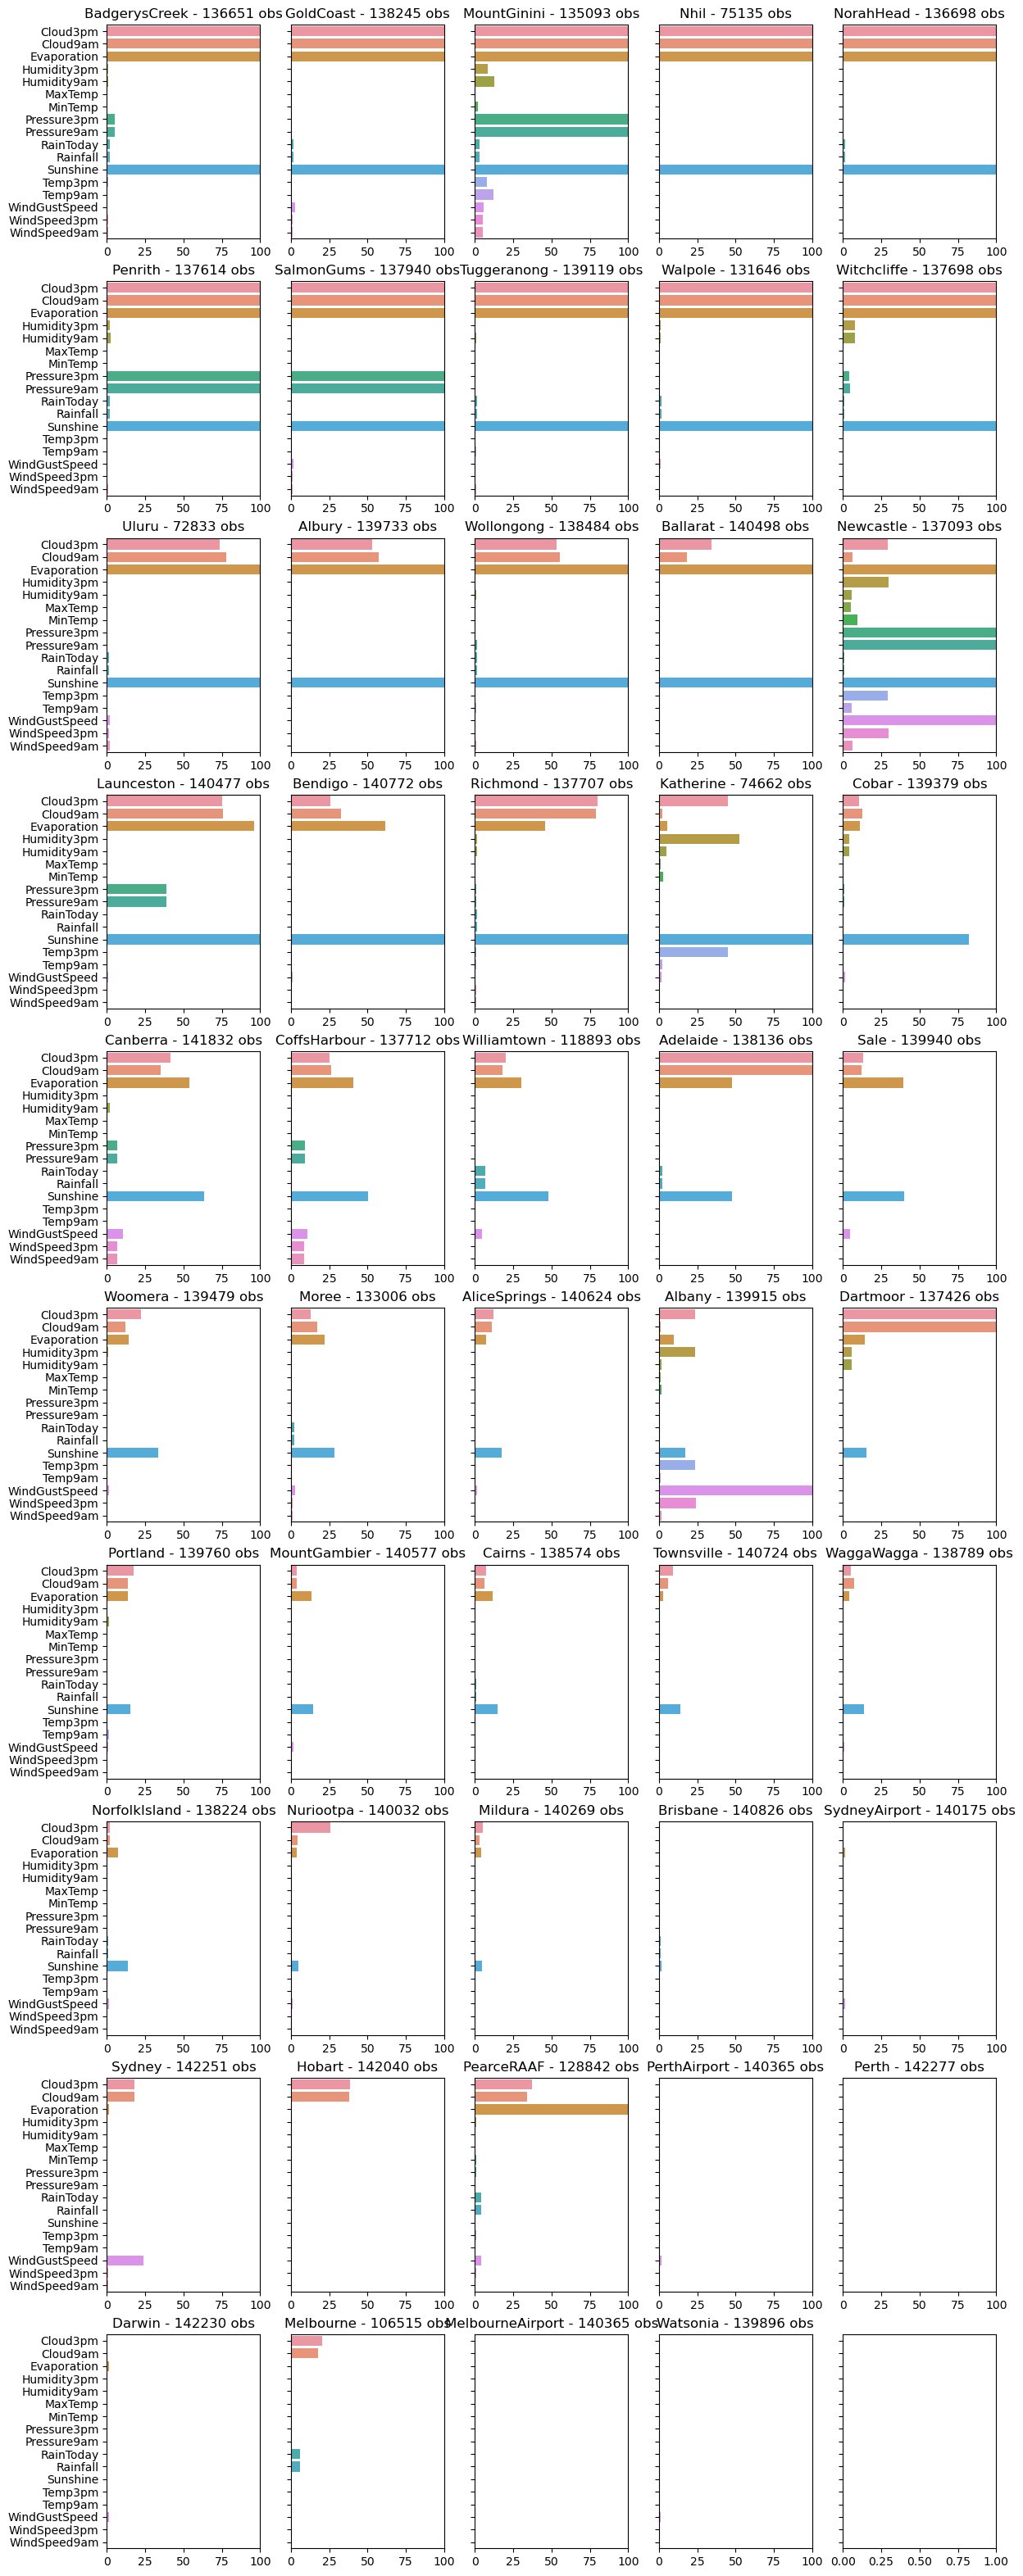

In [16]:
fig_miss_by_loc, ax = plt.subplots(nrows=10, ncols=5, figsize=(14, 40),
                                  sharey=True)
ax = ax.reshape(-1)
list_cols = df_missing_by_location.columns

for i, location in enumerate(df_missing_by_location.index):
    nb_obs = df_nb_obs_by_location.loc[location]
    
    list_vals = df_missing_by_location.loc[location, :].values
    sns.barplot(y = list_cols, x=list_vals, ax=ax[i])
    ax[i].title.set_text(f"{location} - {nb_obs} obs")
    ax[i].set_xlim(0, 100)

plt.show()


Les graphiques ci-dessous représentent les matrices de corrélations des variables quantitatives des villes qui ont peu de données manquantes et celle calculée sur toutes les observations (sans distinguer les villes). Il semble que la corrélation entre deux variables quantitatives données ne dépend pas de Location. Cela suggère qu'on pourrait construire un modèle de prédiction (par exemple le modèle de régression linéaire) d'une variable sur des autres variables et puis l'utiliser pour prédire les valeurs manquantes.

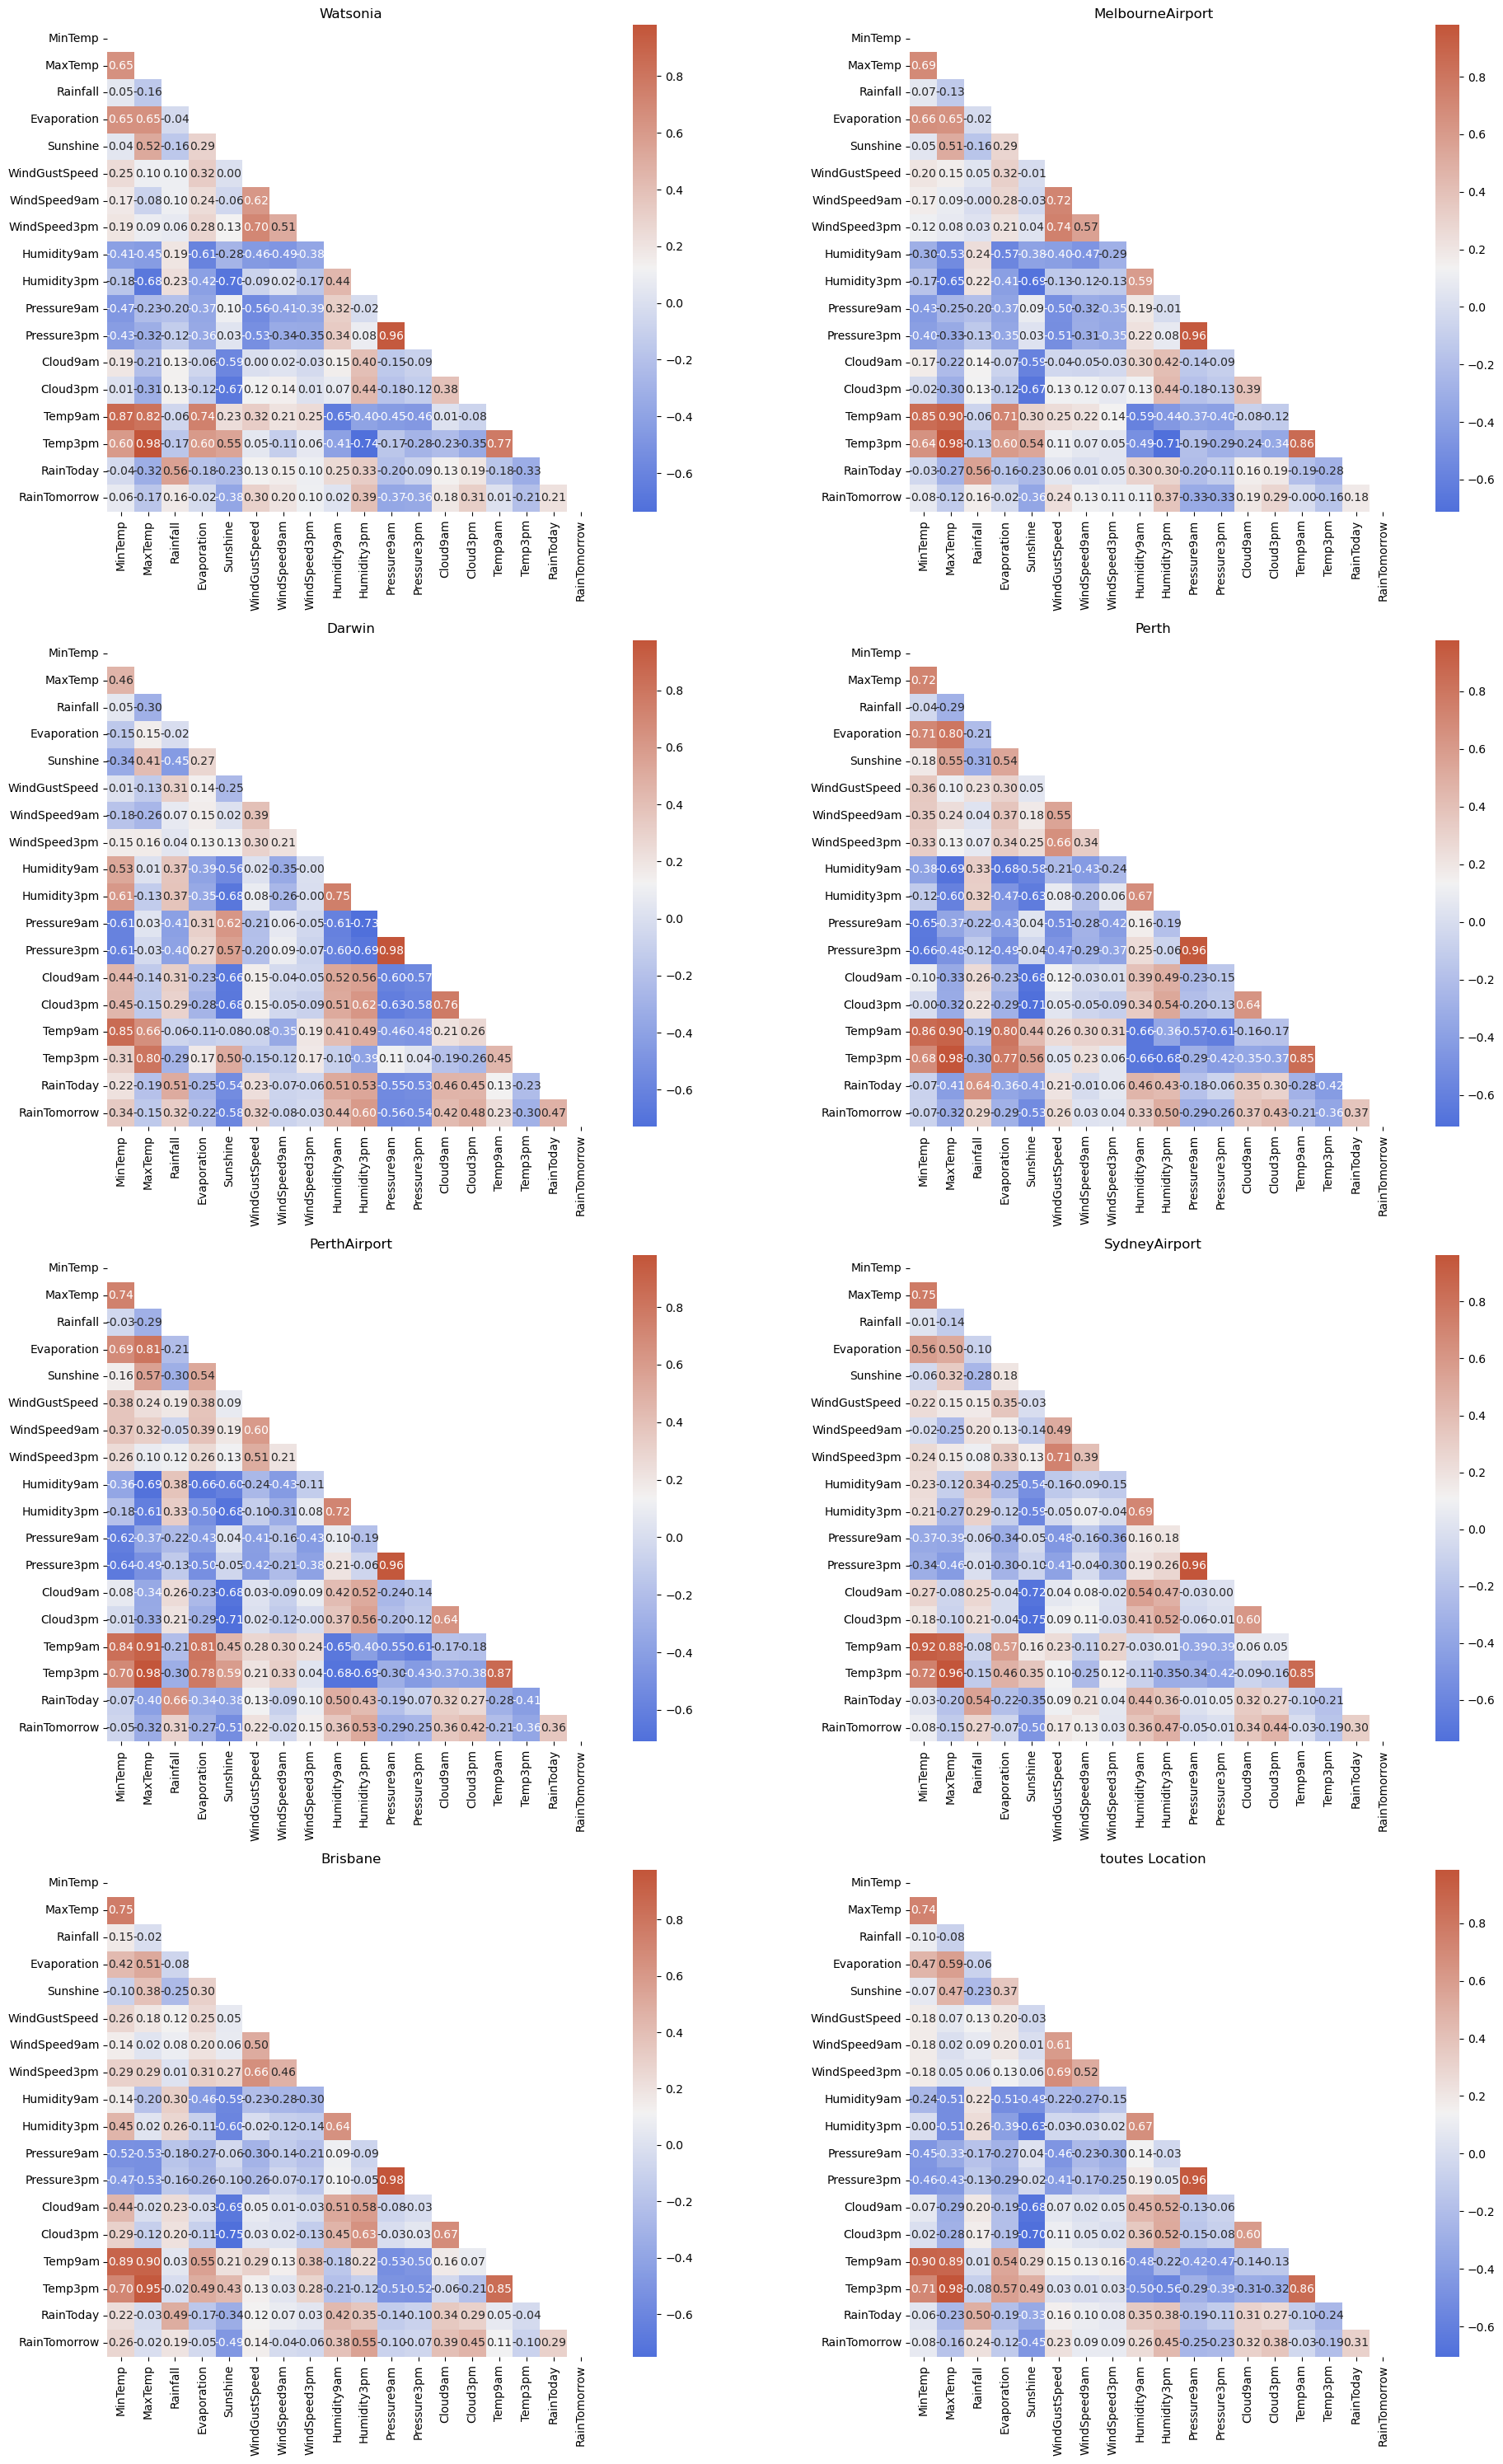

In [17]:
quantitative_variables = list(df_cleaned_data.select_dtypes(include=np.number).columns)

cmap = sns.diverging_palette(260, 20, as_cmap=True)

fig_corr_mat, ax = plt.subplots(figsize=(20, 30), nrows=4, ncols=2)
ax = ax.reshape(-1)

list_location = ["Watsonia", "MelbourneAirport", "Darwin", "Perth", "PerthAirport", "SydneyAirport", "Brisbane"]

for i, location in enumerate(list_location):
    corr_mat = df_cleaned_data.loc[df_cleaned_data.Location == location, quantitative_variables].corr()
    mask = np.triu(np.ones_like(corr_mat))
    sns.heatmap(corr_mat, 
                mask=mask, # masquer la moitié de la matrice
                annot=True, # afficher la corrélation pour chaque élément 
                fmt='.2f',  # arrondir la corrélation (2 décimaux)
                square=True,
                cmap=cmap,
               ax=ax[i])
    ax[i].title.set_text(location)

# Matrice de corrélation des variables sur toutes les observations que ce soit la location
quantitative_variables = list(df_cleaned_data.select_dtypes(include=np.number).columns)

i = 7
corr_mat = df_cleaned_data[quantitative_variables].corr()
mask = np.triu(np.ones_like(corr_mat))
sns.heatmap(corr_mat, 
            mask=mask, # masquer la moitié de la matrice
            annot=True, # afficher la corrélation pour chaque élément 
            fmt='.2f',  # arrondir la corrélation (2 décimaux)
            square=True,
            cmap=cmap,
           ax=ax[i])
ax[i].title.set_text("toutes Location")

plt.tight_layout()
plt.show()

### Traitement des outliers

(JE N'AI PAS ENCORE DE TEMPS DE RÉFLÉCHIR SUR CE POINT)

Les graphiques suivants représentent les boxplot de chaque variable quantitative.

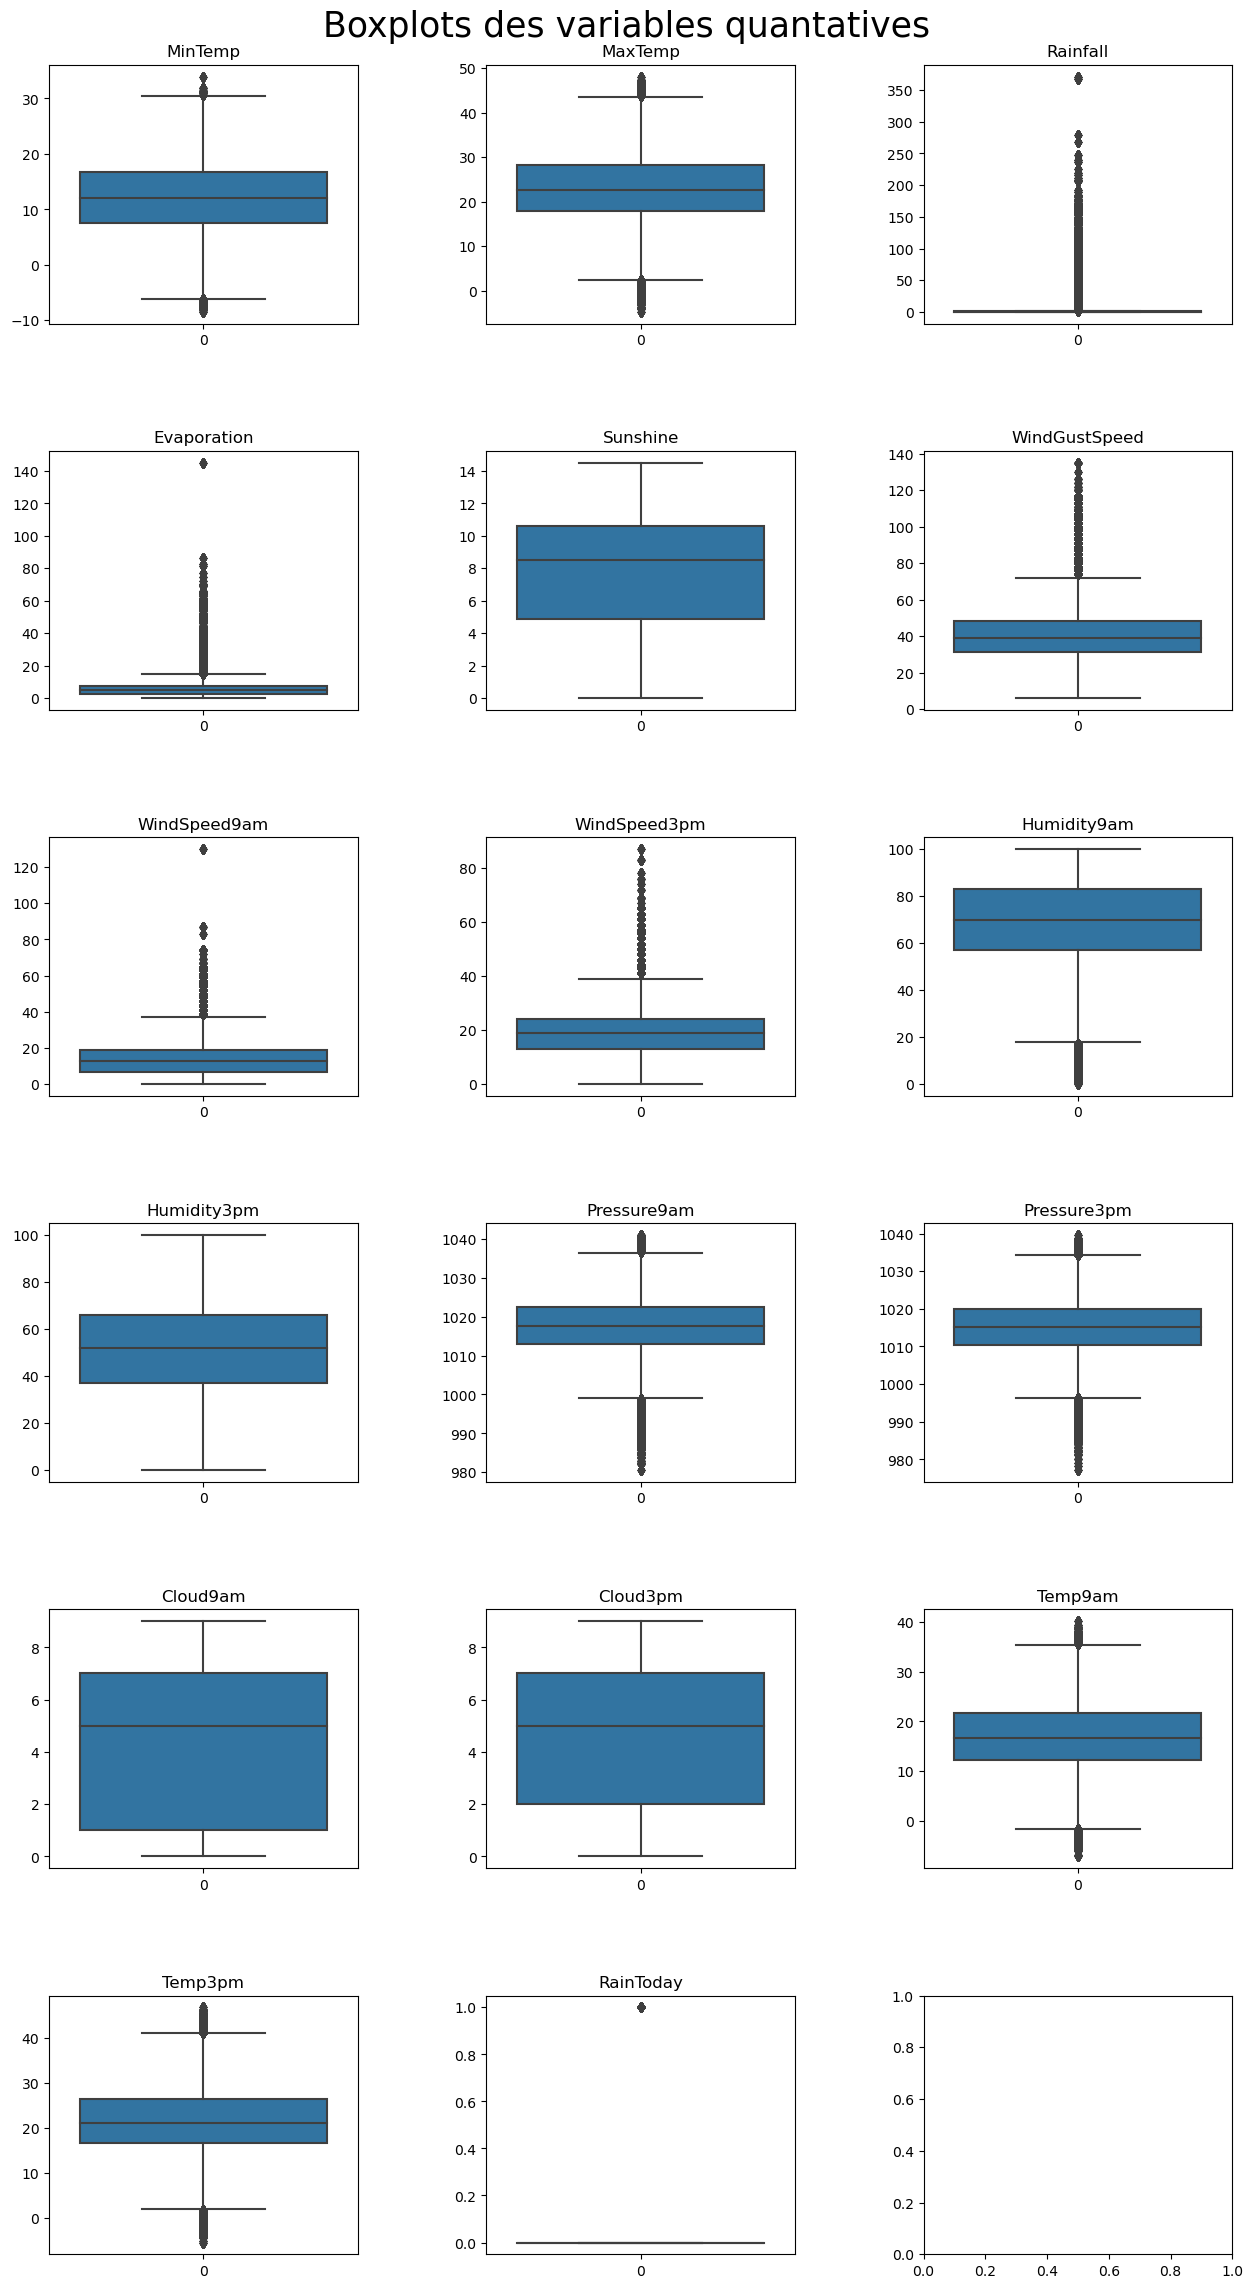

In [18]:
fig_box, axes = plt.subplots(figsize=(14,24), nrows=6, ncols=3)
axes = axes.reshape(-1)

for i, col in enumerate(quantitative_features):
    sns.boxplot(df_cleaned_data[col].fillna(np.nan), ax=axes[i])
    axes[i].title.set_text(col)
    
plt.tight_layout(pad=6.0)
fig_box.suptitle("Boxplots des variables quantatives",
                 fontsize = 25)
plt.show()
